In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(28*28)

# plt.imshow(X_train[7], cmap='gray')
# plt.show()

(60000, 28, 28)
(10000, 28, 28)
(60000,)
784


In [3]:
reshape = 784
X_train = X_train.reshape(60000, reshape)
X_test = X_test.reshape(10000, reshape)
X_train = X_train.astype('float32')
X_test = X_train.astype('float32')

In [4]:
# Pixel values are between 0 -255
X_train /=255
X_test /=255

print(X_train.shape[1])

784


In [5]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
model = Sequential()
model.add(Dense(10,input_shape=(784,)))
model.add(Dense(10, activation='relu'))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
570/570 [==============================] - 1s 1ms/step - loss: 1.8397 - accuracy: 0.4259 - val_loss: 0.9475 - val_accuracy: 0.7567
Epoch 2/50
570/570 [==============================] - 1s 1ms/step - loss: 0.8342 - accuracy: 0.7752 - val_loss: 0.4792 - val_accuracy: 0.8837
Epoch 3/50
570/570 [==============================] - 1s 1ms/step - loss: 0.5517 - accuracy: 0.8483 - val_loss: 0.3772 - val_accuracy: 0.9033
Epoch 4/50
570/570 [==============================] - 1s 1ms/step - loss: 0.4594 - accuracy: 0.8729 - val_loss: 0.3301 - val_accuracy: 0.9137
Epoch 5/50
570/570 [==============================] - 1s 1ms/step - loss: 0.4292 - accuracy: 0.8796 - val_loss: 0.3015 - val_accuracy: 0.9213
Epoch 6/50
570/570 [==============================] - 1s 1ms/step - loss: 0.4001 - accuracy: 0.8866 - val_loss: 0.2835 - val_accuracy: 0.9240
Epoch 7/50
570/570 [==============================] - 1s 1ms/step - loss: 0.3768 - accuracy: 0.8942 - val_loss: 0.2706 - val_accuracy: 0.9247
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'Lower Right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


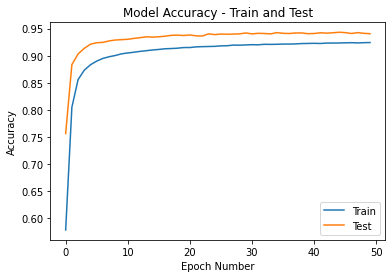

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
model_train = model.fit(X_train, Y_train, batch_size = 100, epochs=50, verbose=1, validation_split=(0.05))

plt.plot(model_train.history['accuracy'], label='Train')
plt.plot(model_train.history['val_accuracy'], label='Test')
plt.title('Model Accuracy - Train and Test')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend(loc='Lower Right')
plt.show()